In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('../datasets/raw/cars.csv')
data['engine_capacity'].fillna(0, inplace=True)
data.drop(columns=['engine_fuel', 'model_name', 'color', 'location_region'], inplace=True)
df = pd.get_dummies(data, columns=['manufacturer_name', 'transmission', 'state', 'engine_type', 'body_type', 'drivetrain'])
y = df['price_usd']
X = df.drop(columns=['price_usd'])
X.shape

test_share = 0.98

test_count = int(data.shape[0] * (1 - test_share))

X_train = X.iloc[test_count:,:]
X_test = X.iloc[:test_count:]

y_train = y.iloc[test_count:]
y_test = y.iloc[:test_count:]

In [3]:
reg = DecisionTreeRegressor(max_depth=9)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.5713437352483094

In [170]:
reg.predict(np.zeros())

TypeError: zeros() missing required argument 'shape' (pos 0)

In [171]:
pickle.dump(reg, open('../models/TreeRegr.sav', 'wb'))

In [155]:
reg_loaded = pickle.load(open('../models/TreeRegr.sav', 'rb'))
reg_loaded.score(X_test, y_test)

0.45483446618785817

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

reg2 = GradientBoostingRegressor(n_estimators=20, random_state=0)
reg2.fit(X_train, y_train)

reg2.score(X_test, y_test)

pickle.dump(reg, open('../models/TreeRegrGBoost.sav', 'wb'))

<AxesSubplot: xlabel='year_produced'>

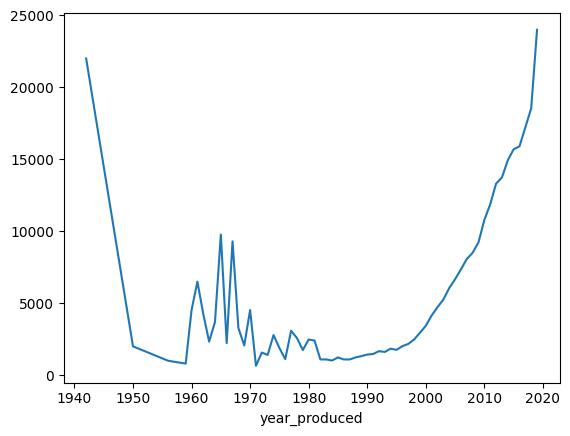

In [54]:
df.groupby('year_produced').mean()['price_usd'].plot.line()

Text(0, 0.5, 'Средний пробег в тыс.км.')

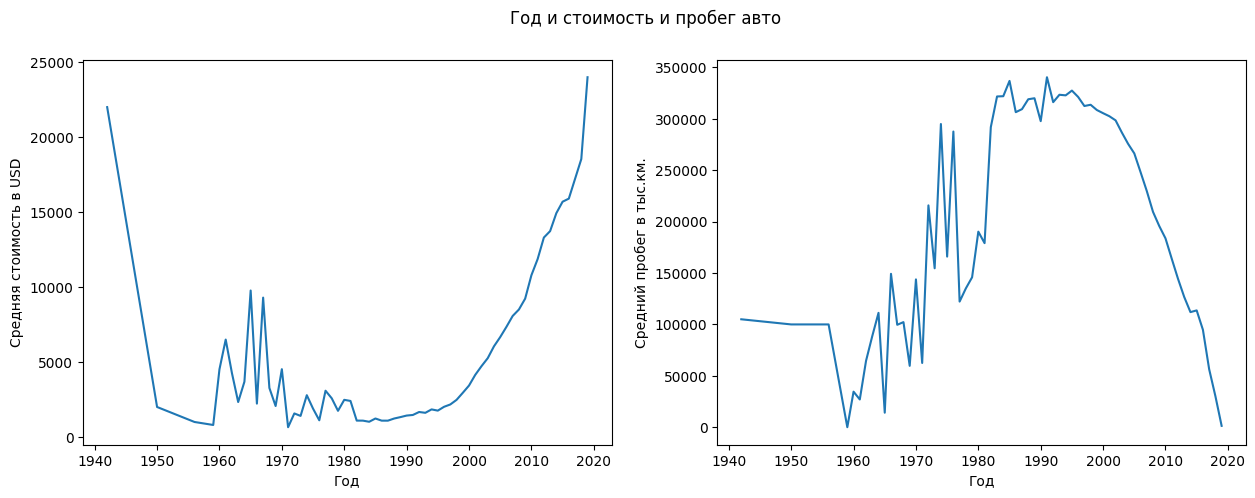

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Год и стоимость и пробег авто")

axes[0].plot(df.groupby('year_produced').mean()['price_usd'])
axes[0].set_xlabel("Год")
axes[0].set_ylabel("Средняя стоимость в USD")


axes[1].plot(df.groupby('year_produced').mean()['odometer_value'])
axes[1].set_xlabel("Год")
axes[1].set_ylabel("Средний пробег в тыс.км.")

In [39]:
df[df['price_usd'].astype(int) > 12000]['transmission_mechanical']

5        0
8        0
18       0
19       0
34       1
        ..
38435    0
38438    0
38466    0
38473    0
38487    0
Name: transmission_mechanical, Length: 5613, dtype: uint8

In [168]:
df.to_csv('../datasets/prepared/cars_full.csv')

In [167]:
X_train.to_csv('../datasets/prepared/cars.csv')

In [165]:
df.columns

Index(['odometer_value', 'year_produced', 'engine_has_gas', 'engine_capacity',
       'has_warranty', 'price_usd', 'is_exchangeable', 'number_of_photos',
       'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed', 'manufacturer_name_Acura',
       'manufacturer_name_Alfa Romeo', 'manufacturer_name_Audi',
       'manufacturer_name_BMW', 'manufacturer_name_Buick',
       'manufacturer_name_Cadillac', 'manufacturer_name_Chery',
       'manufacturer_name_Chevrolet', 'manufacturer_name_Chrysler',
       'manufacturer_name_Citroen', 'manufacturer_name_Dacia',
       'manufacturer_name_Daewoo', 'manufacturer_name_Dodge',
       'manufacturer_name_Fiat', 'manufacturer_name_Ford',
       'manufacturer_name_Geely', 'manufacturer_name_Great Wall',
       'manufacturer_name_Honda', 'manufacturer_name_Hyundai',
       'manufacturer_name_Infiniti', 'manufacturer_name_Iveco',
  

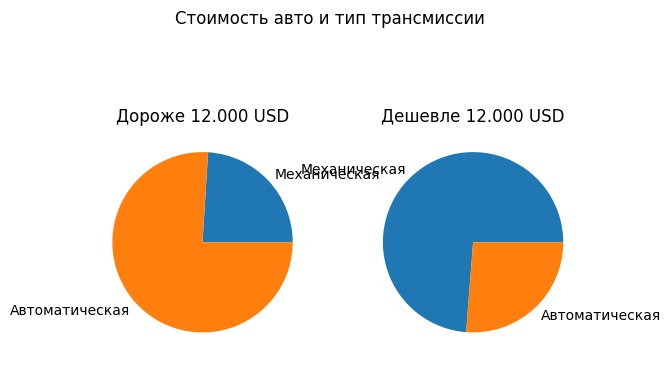

In [108]:
fig, axes = plt.subplots(1, 2)

fig.suptitle("Стоимость авто и тип трансмиссии")

df1 = df[(df['price_usd'].astype(int) > 12000) & df['transmission_mechanical'] == 1]
df2 = df[(df['price_usd'].astype(int) > 12000) & df['transmission_automatic'] == 1]

counts = [df1.shape[0], df2.shape[0]]
axes[0].pie(counts, labels=['Механическая', 'Автоматическая']);
axes[0].set_title("Дороже 12.000 USD")

df1 = df[(df['price_usd'].astype(int) <= 12000) & df['transmission_mechanical'] == 1]
df2 = df[(df['price_usd'].astype(int) <= 12000) & df['transmission_automatic'] == 1]

axes[1].set_title("Дешевле 12.000 USD")
counts = [df1.shape[0], df2.shape[0]]
axes[1].pie(counts, labels=['Механическая', 'Автоматическая']);


[25633, 12898]


<BarContainer object of 2 artists>

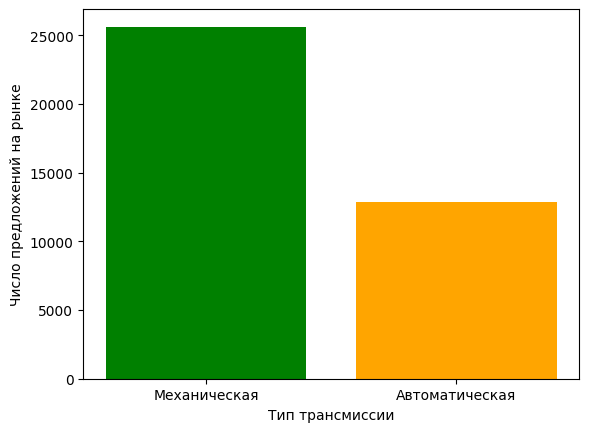

In [125]:
fig, axes = plt.subplots(1, 1)

plt.ylabel("Число предложений на рынке")
plt.xlabel("Тип трансмиссии")

print()
print([df[df['transmission_mechanical'] == 1].shape[0], df[df['transmission_automatic'] == 1].shape[0]])

axes.bar(["Механическая", "Автоматическая"], [df[df['transmission_mechanical'] == 1].shape[0], 
                                              df[df['transmission_automatic'] == 1].shape[0]],
         color=["green", "orange"])

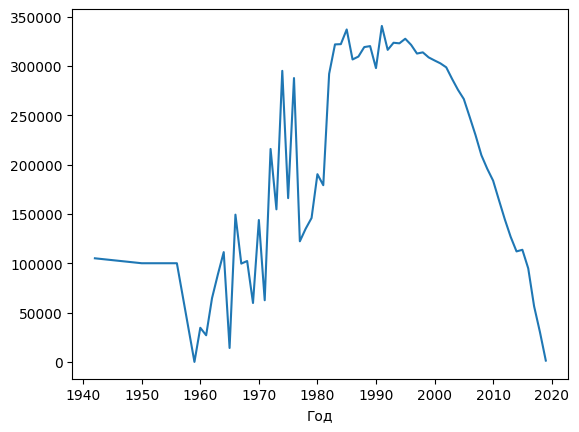

In [99]:
fig, axes = plt.subplots(1, 1)

plt.xlabel("Год")

axes.plot(df.groupby('year_produced').mean()['odometer_value'])

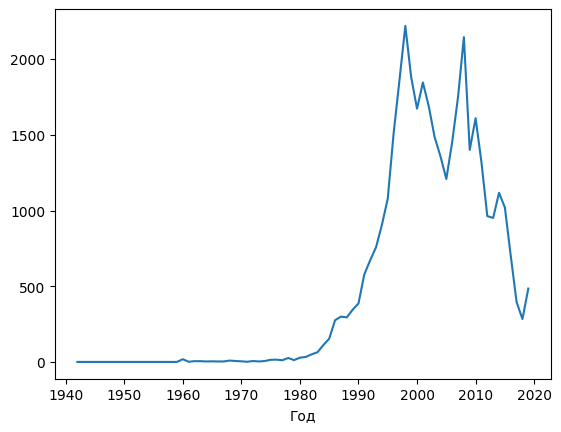

In [148]:
fig, axes = plt.subplots(1, 1)

plt.xlabel("Год")

axes.plot(df.groupby('year_produced').count()['odometer_value'])

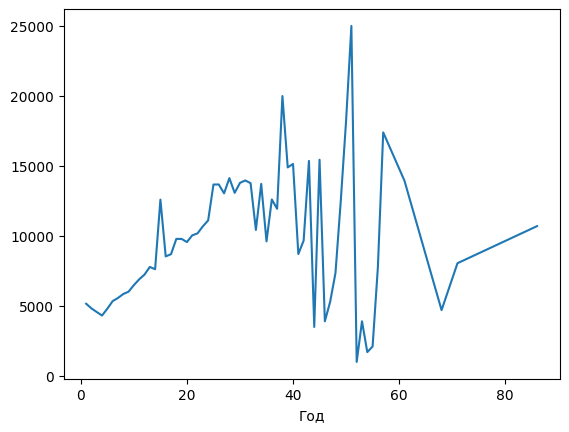

In [98]:
fig, axes = plt.subplots(1, 1)

plt.xlabel("Год")

axes.plot(df.groupby('number_of_photos').mean()['price_usd'])

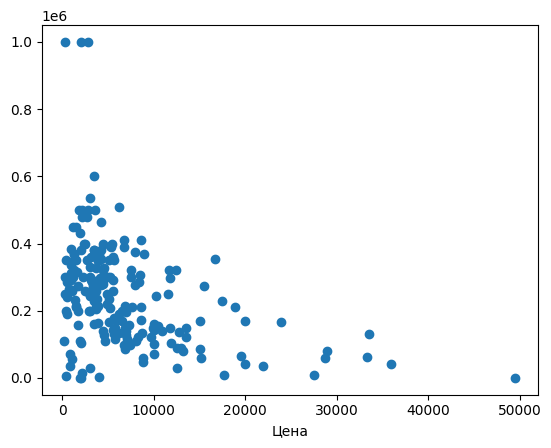

In [144]:
df_mini = df.sample(frac=1).head(200)
x = df_mini['price_usd']
y = df_mini['odometer_value']

fig, axes = plt.subplots(1, 1)

plt.xlabel("Цена")

axes.scatter(x, y)

In [4]:
import tensorflow as tf
import numpy as np

In [66]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),

        tf.keras.layers.Dense(32, activation="linear"),

        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        
        tf.keras.layers.Dense(6, activation="linear"),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(20, activation="linear"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(5, activation="linear"),

        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

In [67]:
model_regression.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 64)                6272      
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_90 (Dense)            (None, 16)                528       
                                                                 
 dropout_39 (Dropout)        (None, 16)                0         
                                                                 
 dense_91 (Dense)            (None, 6)                 102       
                                                                 
 dropout_40 (Dropout)        (None, 6)               

In [68]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")

In [70]:
model_regression.fit(X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32), epochs=100)

Epoch 1/100
1181/1181 [==============================] - 2s 2ms/step - loss: 15114558.0000
Epoch 2/100
1181/1181 [==============================] - 2s 2ms/step - loss: 15086732.0000
Epoch 3/100
1181/1181 [==============================] - 2s 2ms/step - loss: 15276735.0000
Epoch 4/100
1181/1181 [==============================] - 2s 2ms/step - loss: 14368532.0000
Epoch 5/100
1181/1181 [==============================] - 2s 2ms/step - loss: 15093579.0000
Epoch 6/100
1181/1181 [==============================] - 2s 2ms/step - loss: 14626587.0000
Epoch 7/100
1181/1181 [==============================] - 2s 2ms/step - loss: 15056466.0000
Epoch 8/100
1181/1181 [==============================] - 2s 2ms/step - loss: 14992841.0000
Epoch 9/100
1181/1181 [==============================] - 2s 2ms/step - loss: 15037104.0000
Epoch 10/100
1181/1181 [==============================] - 2s 2ms/step - loss: 14388321.0000
Epoch 11/100
1181/1181 [==============================] - 2s 2ms/step - loss: 14901919.00

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report

print(mean_absolute_error(y_test, model_regression.predict(X_test.to_numpy().astype(np.float32))))

25/25 [==============================] - 0s 1ms/step
2527.9921779246147


In [74]:
model_regression.save('../models/NeuralRegr')

INFO:tensorflow:Assets written to: ../models/NeuralRegr\assets


INFO:tensorflow:Assets written to: ../models/NeuralRegr\assets


In [2]:
data = pd.read_csv('../datasets/raw/diabetes.csv')
data = data.sample(frac=1)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
52834,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,8.0,0.0,0.0,0.0,8.0,5.0,6.0
9825,0.0,1.0,0.0,1.0,17.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,6.0,6.0
77120,0.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,10.0,5.0,1.0,1.0,2.0,6.0,7.0
246525,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,5.0,3.0,0.0,0.0,8.0,6.0,7.0
209965,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64910,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
20871,2.0,1.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,4.0,0.0,1.0,10.0,5.0,7.0
181494,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0
30079,0.0,0.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,6.0,6.0


In [3]:
from sklearn.utils import resample

In [4]:
data_0 = data[data['Diabetes_012'] == 0]
data_1 = data[data['Diabetes_012'] == 1]
data_2 = data[data['Diabetes_012'] == 2]

# print(data_0.shape, data_2.shape)

data_0 = resample(data_0, replace=False, n_samples=7500)
data_1 = resample(data_1, replace=True, n_samples=7500)
data_2 = resample(data_2, replace=True, n_samples=7500)

# print(data_0.shape, data_2.shape)

data = pd.concat([data_0, data_1, data_2])

from sklearn.utils import shuffle
data = shuffle(data)

y = data['Diabetes_012']
X = data.drop(columns=['Diabetes_012'])

print(y.shape)


(22500,)


NameError: name 'X_train' is not defined